<h1> Numbers </h1>
    <h3> GSS Data Exploration Using Science News Sources Variables</h3>
    <h4> Import the needed libraries.
    <br> Choose the variables of interest and make them into a list.
    <br> Read the file at the selected columns.
    <br> Limit the dataframe to selected years.
    </h4>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


columns = ['id', 'year', 'age', 'sex', 'race', 'degree', 'scifrom', 'SCINEWS1', 'SCINEWS2', 'SCINEWS3']
df = pd.read_stata("/Users/nada/Downloads/GSS_stata/GSS7218_R1.dta", columns=columns)
df = df.loc[df['year'].isin({2010, 2012, 2014, 2016, 2018})]
df

,id,year,age,sex,race,degree,scifrom,SCINEWS1,SCINEWS2,SCINEWS3
53043,1,2010,31,male,other,bachelor,NaN,NaN,NaN,NaN
53044,2,2010,23,female,white,bachelor,NaN,NaN,NaN,NaN
53045,3,2010,71,female,black,LT HIGH SCHOOL,NaN,NaN,NaN,NaN
53046,4,2010,82,female,white,LT HIGH SCHOOL,NaN,NaN,NaN,NaN
53047,5,2010,78,female,black,LT HIGH SCHOOL,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
64809,2344,2018,37,female,white,HIGH SCHOOL,The Internet,NaN,NaN,Online newspapers
64810,2345,2018,75,female,white,HIGH SCHOOL,tv,NaN,NaN,NaN
64811,2346,2018,67,female,white,HIGH SCHOOL,NaN,NaN,NaN,NaN
64812,2347,2018,72,male,white,HIGH SCHOOL,The Internet,NaN,NaN,"Search engine (Google, Bing)"


<h3> Explore the dataframe and the categories included in each column.</h3>

In [3]:

df1 = df.loc[df['SCINEWS1'].notnull()]
df1.SCINEWS1.unique()

[Printed newspapers, OTHER SPECIFY, Online newspapers]
Categories (3, object): [Printed newspapers < Online newspapers < OTHER SPECIFY]

In [4]:
df2 = df.loc[df['SCINEWS2'].notnull()]

df2.SCINEWS2.unique()

[Printed magazines, Online magazines, OTHER SPECIFY]
Categories (3, object): [Printed magazines < Online magazines < OTHER SPECIFY]

In [5]:
df3 = df.loc[df['SCINEWS3'].notnull()]
df3.SCINEWS3.unique()

[Science site, Online newspapers, No answer, Online magazines, DON'T KNOW, ..., Search engine (Google, Bing), Electronic books & reports, Other, Wikipedia, Government site]
Length: 11
Categories (11, object): [Online newspapers < Online magazines < Science site < News site ... Other < Search engine (Google, Bing) < DON'T KNOW < No answer]

In [6]:
df4 = df.loc[df['scifrom'].notnull()]
df4.scifrom.unique()

[tv, The Internet, Magazines, Newspapers, Books Other printed material, ..., Other, Radio, Family, Friends Colleagues, Ted Talks]
Length: 11
Categories (11, object): [Newspapers < Magazines < The Internet < Books Other printed material ... Family < Friends Colleagues < Other < Ted Talks]

In [7]:
df5 = df.loc[df['degree'].notnull()]
df5.degree.unique()

[bachelor, LT HIGH SCHOOL, JUNIOR COLLEGE, HIGH SCHOOL, graduate]
Categories (5, object): [LT HIGH SCHOOL < HIGH SCHOOL < JUNIOR COLLEGE < bachelor < graduate]

<h3> Visualize the relationship between ScienceNews3 and year.</h3>

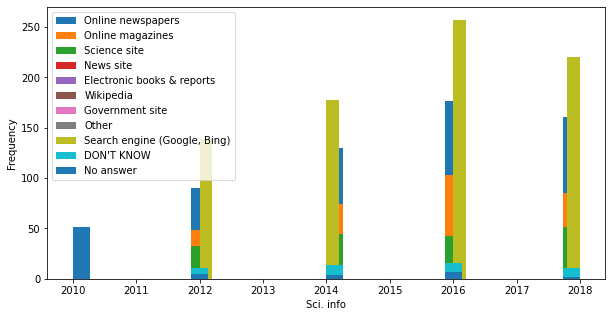

In [9]:
df.groupby('SCINEWS3')['year'].plot(kind='hist', bins=30, figsize = (10,5))
plt.xlabel('Sci. info')
plt.legend();

<h3> Remove the non-numerical category in age.</h3>

In [47]:
df6 = df.loc[df['age'].notnull()]

df6=df6[ df6['age'] != '89 OR OLDER' ]

df6['age'] = [ int (x) for x in df6['age'] ]
df6.age.describe()


count    11632.000000
mean        48.356431
std         17.365963
min         18.000000
25%         34.000000
50%         48.000000
75%         61.000000
max         88.000000
Name: age, dtype: float64

<h3> Visualize the relationship between ScienceNews3 and age. </h3>

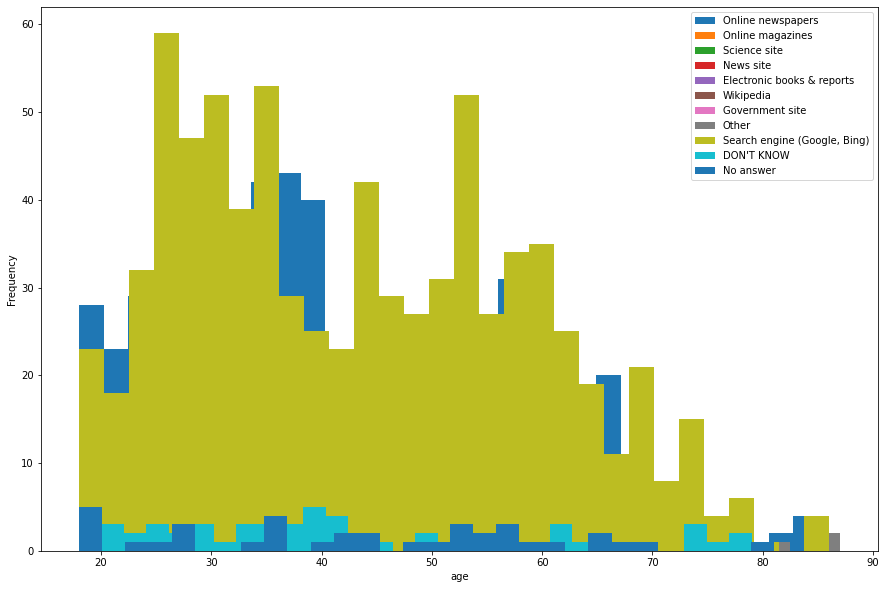

In [48]:
df6.groupby('SCINEWS3')['age'].plot(kind='hist', bins=30, figsize = (15,10))
plt.xlabel('age')
plt.legend();

<h3> Visualize the relationship between Scifrom and year. </h3>

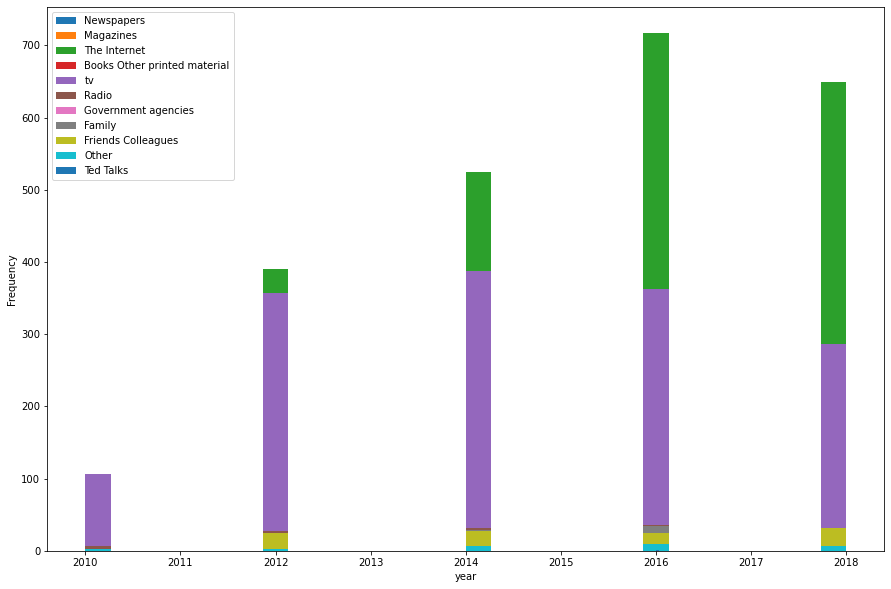

In [49]:
df4.groupby('scifrom')['year'].plot(kind='hist', bins = 30, figsize = (15,10))
plt.xlabel('year')
plt.legend();

<h3> Group by ScienceNews3 and degree, and get the average age for the groups. </h3>

In [193]:
df7 = df6.loc[ df[ 'degree' ].notnull() ]

df7=df7.groupby( ['SCINEWS3', 'degree'] )['age'].mean().round()
df7

SCINEWS3                      degree        
Online newspapers             LT HIGH SCHOOL    37.0
                              HIGH SCHOOL       39.0
                              JUNIOR COLLEGE    44.0
                              bachelor          44.0
                              graduate          44.0
Online magazines              LT HIGH SCHOOL    37.0
                              HIGH SCHOOL       39.0
                              JUNIOR COLLEGE    39.0
                              bachelor          42.0
                              graduate          45.0
Science site                  LT HIGH SCHOOL    41.0
                              HIGH SCHOOL       38.0
                              JUNIOR COLLEGE    44.0
                              bachelor          45.0
                              graduate          47.0
News site                     LT HIGH SCHOOL    52.0
                              HIGH SCHOOL       38.0
                              JUNIOR COLLEGE    42.0
 

<h3> Replace the categorical value in the column "sex" with numerical values. Get mean and median. </h3>

In [139]:
sex_sample = df.loc[df['sex'].notnull()].sample(8)['sex']
sex_sample = sex_sample.replace(['male', 'female'], [0, 1])
print(sex_sample)

print("Mean:", sex_sample.mean())
print("Median:", sex_sample.median())


59822    0
56291    1
54513    1
59732    0
60469    1
56432    0
64587    1
61608    0
Name: sex, dtype: int64
Mean: 0.5
Median: 0.5
